tw: {'台北': 18, '宜蘭': 0, '桃園': 8, '新竹': 7, '苗栗': 3, '彰化': 6, '台中': 11, '南投': 0, '台南': 4, '嘉義': 2, '雲林': 3, '高雄': 13, '屏東': 2, '台東': 0, '花蓮': 0, '澎湖': 0}
tw_off: {'台北': 34, '宜蘭': 1, '桃園': 9, '新竹': 5, '苗栗': 0, '彰化': 2, '台中': 2, '南投': 0, '台南': 3, '嘉義': 0, '雲林': 0, '高雄': 12, '屏東': 2, '台東': 0, '花蓮': 1, '澎湖': 0}


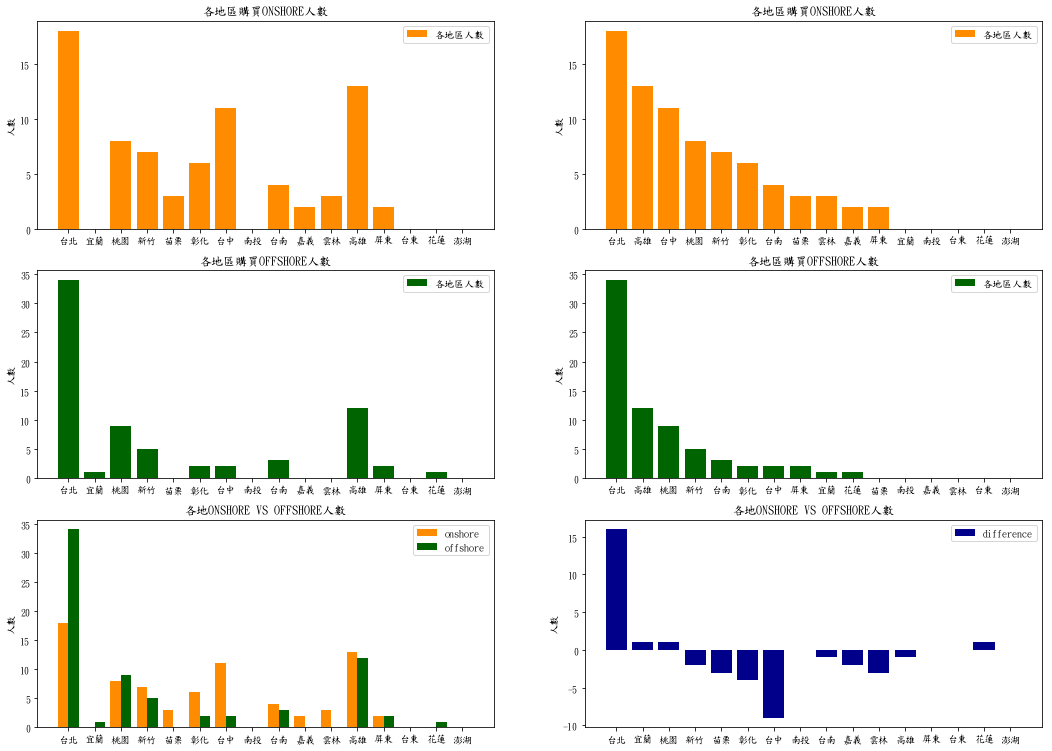

In [35]:
import xlrd
import xlwt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
file_r = "野村證券CRM.xlsx" #資料們
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(1)
onshore_postcode_list = []
onshore_sddress_list = []
tw = {"台北":0,"宜蘭":0,"桃園":0,"新竹":0,"苗栗":0,"彰化":0,"台中":0,"南投":0,"台南":0,"嘉義":0,"雲林":0,"高雄":0,"屏東":0,"台東":0,"花蓮":0,"澎湖":0}
# 讀取文件
for p in range(1,101):
    on_postcode = sheet_1.cell_value(rowx=p,colx=17)
    onshore_postcode_list.append(on_postcode)
    on_adr = sheet_1.cell_value(rowx=p,colx=18)
    onshore_sddress_list.append(on_adr)
#print(onshore_postcode_list)
for i in tw:
    for on_po in onshore_sddress_list:
        if i in on_po:
            tw[str(i)] = tw[str(i)]+1  
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
plt.subplots(figsize=(18,13)) #圖形大小
ax1 = plt.subplot(3,2,1)  #子圖們
#第一行第二列图形
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)
ax6 = plt.subplot(3,2,6)
#选择ax1
#选择ax1
plt.sca(ax1)
tw_place1 = [*tw] #抓出tw dict的keys
plt.bar(tw_place1, list(tw.values()),color = 'darkorange', label='各地區人數')
plt.legend(loc='lower left')
plt.ylabel('人數')
plt.title("各地區購買ONSHORE人數")
yaxis = np.arange(0,20,5)
#plt.ylim(0,20)
plt.yticks(yaxis)
plt.legend()
plt.sca(ax2)
sort_tw_value = list(tw.values())
sort_tw_value.sort(reverse=True)
sort_tw = [[k, tw[k]] for k in sorted(tw, key=tw.get, reverse=True)] 
# sort value後，以list方式儲存
#print(sort_tw)
sort_tw_place = []
for h in range(len(sort_tw)):
    sort_tw_place.append(sort_tw[h][0])
#print(sort_tw_place)
plt.bar(sort_tw_place, sort_tw_value,color = 'darkorange', label='各地區人數')
plt.legend(loc='lower left')
plt.ylabel('人數')
plt.title("各地區購買ONSHORE人數")
yaxis = np.arange(0,20,5)
plt.yticks(yaxis)
plt.legend()
#plt.savefig('C:\\Users\\Will\\Desktop\\MACD6.png') #存成圖檔
print("tw:",tw)
#----------------------------OFF SHORE DATA-------------------
sheet_2 = book_r.sheet_by_index(3)
offshore_postcode_list = []
offshore_sddress_list = []
tw_off = {"台北":0,"宜蘭":0,"桃園":0,"新竹":0,"苗栗":0,"彰化":0,"台中":0,"南投":0,"台南":0,"嘉義":0,"雲林":0,"高雄":0,"屏東":0,"台東":0,"花蓮":0,"澎湖":0}
# 讀取文件
for f in range(1,101):
    off_postcode = sheet_2.cell_value(rowx=f,colx=16)
    offshore_postcode_list.append(off_postcode)
    off_adr = sheet_2.cell_value(rowx=f,colx=17)
    offshore_sddress_list.append(off_adr)
#print('offshore_postcode_list:',offshore_postcode_list)
#print("off_adr:",offshore_sddress_list)
for d in tw_off:
    for off_adr in offshore_sddress_list:
        if d in off_adr:
            tw_off[str(d)] = tw_off[str(d)]+1  
print("tw_off:",tw_off)

plt.sca(ax3)
tw_place1 = [*tw_off] #抓出tw _offdict的keys
plt.bar(tw_place1, list(tw_off.values()),color = 'darkgreen', label='各地區人數')
plt.legend(loc='lower left')
plt.ylabel('人數')
plt.title("各地區購買OFFSHORE人數")
yaxis = np.arange(0,40,5)
#plt.ylim(0,20)
plt.yticks(yaxis)
plt.legend()
plt.sca(ax4)
sort_tw_value_off = list(tw_off.values())
sort_tw_value_off.sort(reverse=True)
sort_tw_off = [[k, tw_off[k]] for k in sorted(tw_off, key=tw_off.get, reverse=True)] 
# sort value後，以list方式儲存
#print(sort_tw_off)
sort_tw_place_off = []
for h in range(len(sort_tw_off)):
    sort_tw_place_off.append(sort_tw_off[h][0])
#print(sort_tw_place_off)
plt.bar(sort_tw_place_off, sort_tw_value_off,color = 'darkgreen', label='各地區人數')
plt.legend(loc='lower left')
plt.ylabel('人數')
plt.title("各地區購買OFFSHORE人數")
yaxis = np.arange(0,40,5)
plt.yticks(yaxis)
plt.legend()
#plt.savefig('C:\\Users\\Will\\Desktop\\MACD6.png') #存成圖檔
#--------------------------------合併比較----------------------
plt.sca(ax5)
plt.bar(tw_place1, list(tw.values()), label = 'onshore', align = "edge",color = 'darkorange', width = -0.4)
plt.bar(tw_place1, list(tw_off.values()), label = 'offshore', align = "edge",color = 'darkgreen', width = 0.4)
plt.legend(loc='lower left')
plt.ylabel('人數')
plt.title("各地ONSHORE VS OFFSHORE人數")
yaxis = np.arange(0,40,5)
#plt.ylim(0,20)
plt.yticks(yaxis)
plt.legend()
#-------------------------------合併比較二----------------------
#計算各區offshore-onshore的差異
tw_difference = []
for s in range(len(tw.values())):
    tw_dif = list(tw_off.values())[s] - list(tw.values())[s]
    tw_difference.append(tw_dif)
plt.sca(ax6)
plt.bar(tw_place1, tw_difference, label = 'difference', align = "center",color = 'darkblue')
plt.legend(loc='lower left')
plt.ylabel('人數')
plt.title("各地ONSHORE VS OFFSHORE人數")
yaxis = np.arange(-10,20,5)
#plt.ylim(0,20)
plt.yticks(yaxis)
plt.legend()
plt.show()

NameError: name 'xlrd' is not defined